Рассчитать tf-idf для слов текста и представить слова в виде числовых векторов.

In [33]:
import pandas as pd
from csv import writer
import json
import pickle
import nltk
nltk.download("stopwords")
import re
pd.options.mode.chained_assignment = None
import math
from tqdm import trange

[nltk_data] Downloading package stopwords to /home/muren/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
text = pd.read_csv(f'inetensive_1.csv')
print(text['text'])

0         Wall St. Bears Claw Back Into the Black (Reute...
1         Carlyle Looks Toward Commercial Aerospace (Reu...
2         Oil and Economy Cloud Stocks' Outlook (Reuters...
3         Iraq Halts Oil Exports from Main Southern Pipe...
4         Oil prices soar to all-time record, posing new...
                                ...                        
119995    Pakistan's Musharraf Says Won't Quit as Army C...
119996    Renteria signing a top-shelf deal Red Sox gene...
119997    Saban not going to Dolphins yet The Miami Dolp...
119998    Today's NFL games PITTSBURGH at NY GIANTS Time...
119999    Nets get Carter from Raptors INDIANAPOLIS -- A...
Name: text, Length: 120000, dtype: object


In [37]:
syntax = ".,?!;:-)(\/#0123456789"
stopwords = nltk.corpus.stopwords.words("english")

print(text['text'].size)
text['edited'] = "sometext"
for i in trange(text['text'].size):
    text['edited'][i] = text['text'][i].lower()
    for j in syntax:
        text['edited'][i] = text['edited'][i].replace(j, "")
    text['edited'][i] = text['edited'][i].replace('  ', " ")
    
    text['edited'][i] = [word for word in text['edited'][i].split(' ') if word not in stopwords]

120000


100%|██████████████████████████████████| 120000/120000 [04:31<00:00, 441.38it/s]


In [38]:
def tf(s: list, global_occ_count: dict) -> dict:
    occ = pd.Series.to_dict(pd.value_counts(s))
    total = sum(occ.values())
    
    for i in occ.keys():
        if i in global_occ_count.keys():
            global_occ_count[i] += 1;
        else:
            global_occ_count[i] = 1;
            
        occ[i] = occ[i]/total
    
    return occ

In [40]:
text['tf'] = {'test': 2}
global_occ_count =  {}

for i in trange(text['text'].size):
    text['tf'][i] = tf(text['edited'][i], global_occ_count)


100%|█████████████████████████████████| 120000/120000 [00:18<00:00, 6339.03it/s]


In [41]:
print(sum(text['tf'][0].values()))
text.to_csv("modified.csv", index=False)

0.9999999999999999


In [42]:
def idf(total: int, global_occ, words: list) -> dict:
    res = dict()
    for word in words:
        res[word] = math.log(total/global_occ[word])
    
    return res

In [43]:
text['idf'] = {'test': 2}
for i in trange(text['text'].size):
    text['idf'][i] = idf(text['text'].size, global_occ_count, text['tf'][i].keys())

100%|████████████████████████████████| 120000/120000 [00:01<00:00, 67477.15it/s]


In [44]:
text.to_csv("modified.csv", index=False)

# Создание векторного представления предложений

In [45]:
text = pd.read_csv(f'modified.csv')

In [46]:
null_vector = {} # паттерн вектора, который мы будем добавлять каждому тексту и менять в зависимости от текста

for i in trange(text['text'].size):
    for k in eval(text['tf'][i]).keys():
    #for k in text['tf'][i].keys():
        null_vector[k] = 0;

print(len(null_vector.keys()))

100%|████████████████████████████████| 120000/120000 [00:06<00:00, 19420.59it/s]

97691


In [13]:
columns = set(null_vector.keys())

with open(f'vectors.csv', 'w', newline='') as f_object:
    writer_object = writer(f_object)
    
    for i in trange(text['text'].size):
        new = null_vector.copy()
        #for word in text['tf'][i].keys():
        for word in eval(text['tf'][i]).keys():
            new[word] = float(eval(text['tf'][i])[word]) * float(eval(text['idf'][i])[word])
        #text['vector'][i][word] = text['tf'][i][word] * text['idf'][i][word]
        
        list_data = list(new.values())
        list_data.insert(0, i)
        writer_object.writerow(list_data)
        #text['vector'][i] = text['vector'][i].values()
    
    f_object.close()

NameError: name 'cloumns' is not defined

# Обучение классификатора

In [16]:
take_rows = 2000
columns = list(null_vector.keys())

vectors = pd.read_csv(f'vectors.csv', nrows=take_rows, names=columns, header=None)
text = pd.read_csv(f'modified.csv', nrows=take_rows)

vectors.head()

,wall,reuters,st,bears,claw,back,black,shortsellers,street's,dwindlingband,...,keypositions,andredeployed,quitlebanon,interrogating,quizzing,'offensive',faultfilled,threebook,rauffer,windaffected
0,0.610082,0.296997,0.29906,0.404269,0.590802,0.230783,0.357583,0.733473,0.503474,0.779683,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.178198,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.185623,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.164998,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [20]:
X_train, X_test, y_train, y_test = train_test_split(vectors, text['label'], test_size=0.2)

In [21]:
model = CatBoostClassifier(random_state=1)
model.fit(X_train, y_train, verbose=1)

Learning rate set to 0.081046
0:	learn: 1.3520083	total: 79.4ms	remaining: 1m 19s
1:	learn: 1.3288496	total: 106ms	remaining: 52.9s
2:	learn: 1.3044130	total: 132ms	remaining: 43.9s
3:	learn: 1.2839052	total: 158ms	remaining: 39.3s
4:	learn: 1.2627729	total: 183ms	remaining: 36.5s
5:	learn: 1.2452053	total: 211ms	remaining: 35s
6:	learn: 1.2326871	total: 238ms	remaining: 33.8s
7:	learn: 1.2204667	total: 263ms	remaining: 32.7s
8:	learn: 1.2073807	total: 289ms	remaining: 31.8s
9:	learn: 1.1961515	total: 314ms	remaining: 31.1s
10:	learn: 1.1876549	total: 340ms	remaining: 30.5s
11:	learn: 1.1782645	total: 366ms	remaining: 30.1s
12:	learn: 1.1655453	total: 392ms	remaining: 29.7s
13:	learn: 1.1552596	total: 419ms	remaining: 29.5s
14:	learn: 1.1485183	total: 445ms	remaining: 29.2s
15:	learn: 1.1420783	total: 471ms	remaining: 28.9s
16:	learn: 1.1353211	total: 496ms	remaining: 28.7s
17:	learn: 1.1245075	total: 521ms	remaining: 28.4s
18:	learn: 1.1162164	total: 547ms	remaining: 28.2s
19:	learn: 

164:	learn: 0.7244849	total: 4.34s	remaining: 21.9s
165:	learn: 0.7231777	total: 4.36s	remaining: 21.9s
166:	learn: 0.7224269	total: 4.39s	remaining: 21.9s
167:	learn: 0.7205801	total: 4.42s	remaining: 21.9s
168:	learn: 0.7194212	total: 4.44s	remaining: 21.8s
169:	learn: 0.7182209	total: 4.47s	remaining: 21.8s
170:	learn: 0.7172362	total: 4.49s	remaining: 21.8s
171:	learn: 0.7165753	total: 4.52s	remaining: 21.8s
172:	learn: 0.7151302	total: 4.54s	remaining: 21.7s
173:	learn: 0.7140156	total: 4.57s	remaining: 21.7s
174:	learn: 0.7125373	total: 4.6s	remaining: 21.7s
175:	learn: 0.7110144	total: 4.62s	remaining: 21.6s
176:	learn: 0.7100024	total: 4.65s	remaining: 21.6s
177:	learn: 0.7089365	total: 4.67s	remaining: 21.6s
178:	learn: 0.7079850	total: 4.7s	remaining: 21.6s
179:	learn: 0.7066841	total: 4.73s	remaining: 21.5s
180:	learn: 0.7054764	total: 4.75s	remaining: 21.5s
181:	learn: 0.7039851	total: 4.78s	remaining: 21.5s
182:	learn: 0.7030657	total: 4.81s	remaining: 21.5s
183:	learn: 0.

324:	learn: 0.5866216	total: 8.48s	remaining: 17.6s
325:	learn: 0.5862014	total: 8.51s	remaining: 17.6s
326:	learn: 0.5855361	total: 8.54s	remaining: 17.6s
327:	learn: 0.5844401	total: 8.56s	remaining: 17.5s
328:	learn: 0.5837342	total: 8.59s	remaining: 17.5s
329:	learn: 0.5833348	total: 8.61s	remaining: 17.5s
330:	learn: 0.5829993	total: 8.64s	remaining: 17.5s
331:	learn: 0.5820287	total: 8.66s	remaining: 17.4s
332:	learn: 0.5812582	total: 8.69s	remaining: 17.4s
333:	learn: 0.5804518	total: 8.72s	remaining: 17.4s
334:	learn: 0.5799913	total: 8.74s	remaining: 17.4s
335:	learn: 0.5793616	total: 8.77s	remaining: 17.3s
336:	learn: 0.5785478	total: 8.79s	remaining: 17.3s
337:	learn: 0.5780469	total: 8.82s	remaining: 17.3s
338:	learn: 0.5775225	total: 8.85s	remaining: 17.2s
339:	learn: 0.5767783	total: 8.87s	remaining: 17.2s
340:	learn: 0.5763968	total: 8.9s	remaining: 17.2s
341:	learn: 0.5759022	total: 8.92s	remaining: 17.2s
342:	learn: 0.5754618	total: 8.95s	remaining: 17.1s
343:	learn: 0

484:	learn: 0.5038594	total: 12.7s	remaining: 13.4s
485:	learn: 0.5034279	total: 12.7s	remaining: 13.4s
486:	learn: 0.5030330	total: 12.7s	remaining: 13.4s
487:	learn: 0.5028343	total: 12.7s	remaining: 13.4s
488:	learn: 0.5023159	total: 12.8s	remaining: 13.3s
489:	learn: 0.5020099	total: 12.8s	remaining: 13.3s
490:	learn: 0.5012063	total: 12.8s	remaining: 13.3s
491:	learn: 0.5008395	total: 12.8s	remaining: 13.3s
492:	learn: 0.5004789	total: 12.9s	remaining: 13.2s
493:	learn: 0.5002680	total: 12.9s	remaining: 13.2s
494:	learn: 0.4999730	total: 12.9s	remaining: 13.2s
495:	learn: 0.4996103	total: 12.9s	remaining: 13.2s
496:	learn: 0.4992450	total: 13s	remaining: 13.1s
497:	learn: 0.4989219	total: 13s	remaining: 13.1s
498:	learn: 0.4984111	total: 13s	remaining: 13.1s
499:	learn: 0.4981896	total: 13s	remaining: 13s
500:	learn: 0.4979392	total: 13.1s	remaining: 13s
501:	learn: 0.4977278	total: 13.1s	remaining: 13s
502:	learn: 0.4972622	total: 13.1s	remaining: 13s
503:	learn: 0.4969441	total:

644:	learn: 0.4526409	total: 16.8s	remaining: 9.26s
645:	learn: 0.4523910	total: 16.8s	remaining: 9.23s
646:	learn: 0.4521446	total: 16.9s	remaining: 9.21s
647:	learn: 0.4517649	total: 16.9s	remaining: 9.18s
648:	learn: 0.4512250	total: 16.9s	remaining: 9.15s
649:	learn: 0.4506929	total: 17s	remaining: 9.13s
650:	learn: 0.4503946	total: 17s	remaining: 9.1s
651:	learn: 0.4502107	total: 17s	remaining: 9.08s
652:	learn: 0.4499341	total: 17s	remaining: 9.05s
653:	learn: 0.4497058	total: 17.1s	remaining: 9.02s
654:	learn: 0.4491817	total: 17.1s	remaining: 9s
655:	learn: 0.4489225	total: 17.1s	remaining: 8.97s
656:	learn: 0.4483939	total: 17.1s	remaining: 8.95s
657:	learn: 0.4481849	total: 17.2s	remaining: 8.92s
658:	learn: 0.4479634	total: 17.2s	remaining: 8.89s
659:	learn: 0.4475988	total: 17.2s	remaining: 8.87s
660:	learn: 0.4471798	total: 17.2s	remaining: 8.84s
661:	learn: 0.4469969	total: 17.3s	remaining: 8.81s
662:	learn: 0.4464973	total: 17.3s	remaining: 8.79s
663:	learn: 0.4462065	to

804:	learn: 0.4103117	total: 21s	remaining: 5.09s
805:	learn: 0.4100918	total: 21s	remaining: 5.06s
806:	learn: 0.4098482	total: 21.1s	remaining: 5.04s
807:	learn: 0.4096417	total: 21.1s	remaining: 5.01s
808:	learn: 0.4093373	total: 21.1s	remaining: 4.99s
809:	learn: 0.4092385	total: 21.1s	remaining: 4.96s
810:	learn: 0.4091200	total: 21.2s	remaining: 4.93s
811:	learn: 0.4089201	total: 21.2s	remaining: 4.91s
812:	learn: 0.4080960	total: 21.2s	remaining: 4.88s
813:	learn: 0.4077941	total: 21.2s	remaining: 4.85s
814:	learn: 0.4074817	total: 21.3s	remaining: 4.83s
815:	learn: 0.4072400	total: 21.3s	remaining: 4.8s
816:	learn: 0.4069288	total: 21.3s	remaining: 4.78s
817:	learn: 0.4065942	total: 21.3s	remaining: 4.75s
818:	learn: 0.4061679	total: 21.4s	remaining: 4.72s
819:	learn: 0.4058860	total: 21.4s	remaining: 4.7s
820:	learn: 0.4057658	total: 21.4s	remaining: 4.67s
821:	learn: 0.4055261	total: 21.5s	remaining: 4.64s
822:	learn: 0.4053534	total: 21.5s	remaining: 4.62s
823:	learn: 0.4052

964:	learn: 0.3740042	total: 25.1s	remaining: 912ms
965:	learn: 0.3738857	total: 25.2s	remaining: 886ms
966:	learn: 0.3737773	total: 25.2s	remaining: 860ms
967:	learn: 0.3734650	total: 25.2s	remaining: 834ms
968:	learn: 0.3731196	total: 25.3s	remaining: 808ms
969:	learn: 0.3727729	total: 25.3s	remaining: 782ms
970:	learn: 0.3725955	total: 25.3s	remaining: 756ms
971:	learn: 0.3723878	total: 25.3s	remaining: 730ms
972:	learn: 0.3721534	total: 25.4s	remaining: 704ms
973:	learn: 0.3719992	total: 25.4s	remaining: 678ms
974:	learn: 0.3716300	total: 25.4s	remaining: 651ms
975:	learn: 0.3710769	total: 25.4s	remaining: 625ms
976:	learn: 0.3709383	total: 25.5s	remaining: 599ms
977:	learn: 0.3707615	total: 25.5s	remaining: 573ms
978:	learn: 0.3706683	total: 25.5s	remaining: 547ms
979:	learn: 0.3704528	total: 25.5s	remaining: 521ms
980:	learn: 0.3702957	total: 25.6s	remaining: 495ms
981:	learn: 0.3700941	total: 25.6s	remaining: 469ms
982:	learn: 0.3695012	total: 25.6s	remaining: 443ms
983:	learn: 

acc:  0.775


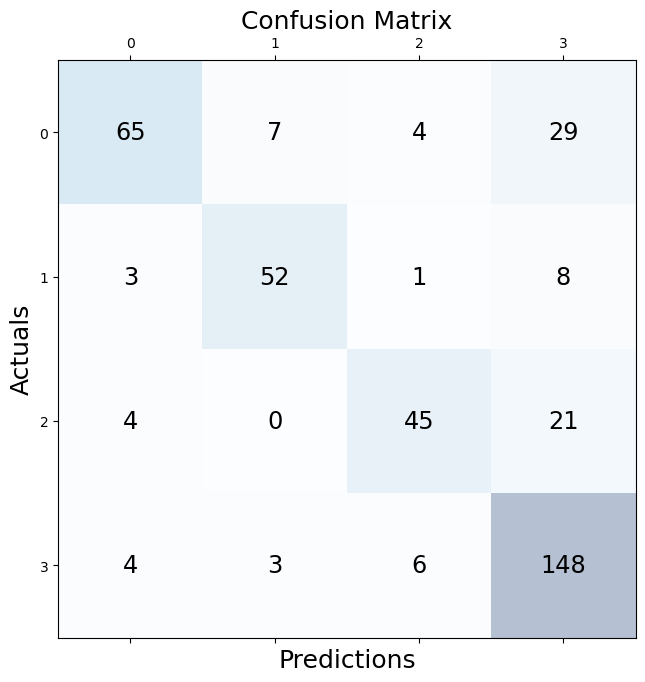

In [32]:
preds = model.predict(X_test)

print("acc: ", accuracy_score(y_test, preds))

conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()